# Import libraries

In [1]:
from tqdm import tqdm
import pickle
from imutils import paths
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab.patches import cv2_imshow

# Load data

In [2]:
def loadData(path):
    imagePaths = list(paths.list_images(path))
    data = []
    labels = []

    for imagePath in tqdm(imagePaths):
        label = imagePath.split(os.path.sep)[-2]
        # Read image
        imageGray = cv2.imread(imagePath, 0)

        # Resize
        imageResize = cv2.resize(imageGray, (128,128))

        # Rescale
        imageRescale = imageResize / 255.

        # Flatten image
        dataFlatten = imageRescale.flatten()

        data.append(dataFlatten)
        labels.append(label)
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

In [3]:
xTrain, yTrain = loadData(('/content/drive/MyDrive/CS331/imageDropData/train'))

100%|██████████| 4000/4000 [33:38<00:00,  1.98it/s]


In [4]:
xTest, yTest = loadData(('/content/drive/MyDrive/CS331/imageDropData/test'))

100%|██████████| 1000/1000 [08:32<00:00,  1.95it/s]


In [5]:
lb = LabelEncoder()
yTrain = lb.fit_transform(yTrain)
yTest = lb.fit_transform(yTest)

In [6]:
labelMapping = dict(zip(lb.classes_, lb.transform(lb.classes_)))
print(labelMapping)

{'heart': 0, 'oblong': 1, 'oval': 2, 'round': 3, 'square': 4}


# Train model

In [7]:
model  = KNeighborsClassifier(n_neighbors=5)
model.fit(xTrain, yTrain)

KNeighborsClassifier()

In [8]:
yTestPre = model.predict(xTest)
print("Test Accuracy:", accuracy_score(yTest, yTestPre))

Test Accuracy: 0.463


In [9]:
print(classification_report(yTest, yTestPre,target_names=['heart', 'oblong', 'oval', 'round', 'square']))

              precision    recall  f1-score   support

       heart       0.45      0.47      0.46       200
      oblong       0.57      0.56      0.56       200
        oval       0.37      0.41      0.39       200
       round       0.49      0.41      0.45       200
      square       0.46      0.46      0.46       200

    accuracy                           0.46      1000
   macro avg       0.47      0.46      0.46      1000
weighted avg       0.47      0.46      0.46      1000



Text(24.0, 0.5, 'Ground Truth')

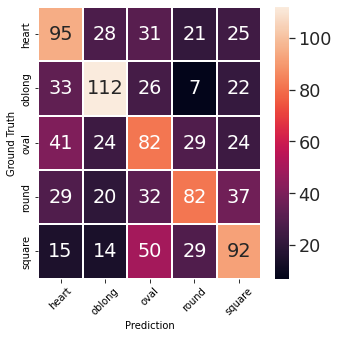

In [10]:
fig, ax = plt.subplots(figsize=(5,5))
sns.set(font_scale=1.6)
cm = confusion_matrix(yTest, yTestPre, labels=model.classes_)
sns.heatmap(cm, linewidths=1, annot=True, ax=ax, fmt='g', 
            xticklabels=['heart', 'oblong', 'oval', 'round', 'square'],
            yticklabels=['heart', 'oblong', 'oval', 'round', 'square'],
            )
plt.xticks(rotation=45)
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
